In [11]:
import solutions as sol
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [12]:
mas = 4.84814e-9       #radians
au  = 1.495978707e11   #meters
c   = 2.99792458e8     #meters
pc  = 3.0857e16        #meters
re  = 2.8179403227e-15 #meters

In [13]:
dlens = 389.*pc
dpsr  = 620.*pc
lo    = c/(314.5e6)

la   = 1.0e5*au
T    = 0.03*au
A    = 0.3*au
inc  = 1.0e-5

R  = la**2./(4.*np.pi**2.*A*np.cos(inc)**3.*np.sqrt(1.-la**2./(4.*np.pi**2.*A**2.)*np.tan(inc)**2.))
s  = 1. - dlens/dpsr
r  = R/dlens
t  = T/dlens

def dn(dne,lo):
    re  = 2.8179403227e-15 #meters
    return -1. * lo**2. * dne * re / (2.*np.pi)

dne1 = 0.003*1e6
dne2 = 0.3*1e6

In [14]:
print(r'R = {:.2f} pc'.format(R/pc))
print(r'T = {} AU'.format(T/au))
print(r'r = {:.2f}'.format(r))
print(r't = {:.4f} mas'.format(t/mas))
print(r's = {:.4f}'.format(s))

R = 4829.05 pc
T = 0.03 AU
r = 12.41
t = 0.0771 mas
s = 0.3726


### Lens Profile:

In [19]:
xi = np.arange(-T/2,T/2,T/1000.)
zi = 2*np.sqrt((R+T)*(xi+T/2.))

xo = np.arange(T/2,10.*T,T/1000.)
zo = 2*T*np.sqrt(1.+R/(2.*xo))

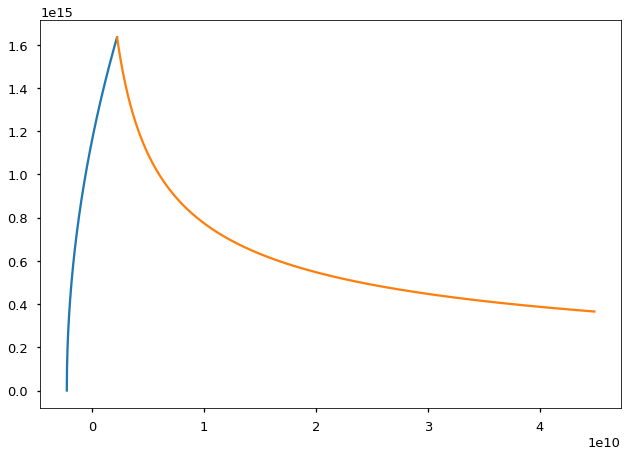

In [20]:
plt.plot(xi,zi)
plt.plot(xo,zo)

In [21]:
# Inner part of the lens
def beta(theta,dn,r,t):
    return theta + s*dn*np.sqrt(4*r/(theta+t/2))
def mu(theta,dn,r,t):
    return 1./(1.- s*dn*np.sqrt(r)/(theta+t/2)**(3/2))

In [22]:
# Outer part of the lens
betas = np.arange(-100*mas,100*mas,1e-10)
thetas_p = np.zeros((betas.shape[0],2))
mus_p    = np.zeros((betas.shape[0],2))
thetas_n = np.zeros((betas.shape[0],2))
mus_n    = np.zeros((betas.shape[0],2))
for i in range(len(betas)):
    thetas_p[i,:], mus_p[i,:] = sol.get_soln(r,dn(dne1,lo)*t,betas[i],s)
    thetas_n[i,:], mus_n[i,:] = sol.get_soln(r,dn(-dne1,lo)*t,betas[i],s)

/Users/dana/Desktop/folded-lens-paper/notebooks/solutions.py:69: RuntimeWarning: invalid value encountered in power
  + ( s * thetaR * dnthetaT)/(theta**3.*(1. + thetaR/(2. * theta))**(1./2.))))
/Users/dana/Desktop/folded-lens-paper/notebooks/solutions.py:69: RuntimeWarning: invalid value encountered in sqrt
  + ( s * thetaR * dnthetaT)/(theta**3.*(1. + thetaR/(2. * theta))**(1./2.))))


In [23]:
theta = np.arange(-t/2,t/2+1e-16,1e-16)

In [24]:
# Minimum beta, maximum mu
beta(t/2,dn(dne1,lo),r,t)/mas, mu(t/2,dn(dne1,lo),r,t)

(-34.201356926321907, 0.0044844948849594689)

/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


(-10, 10)

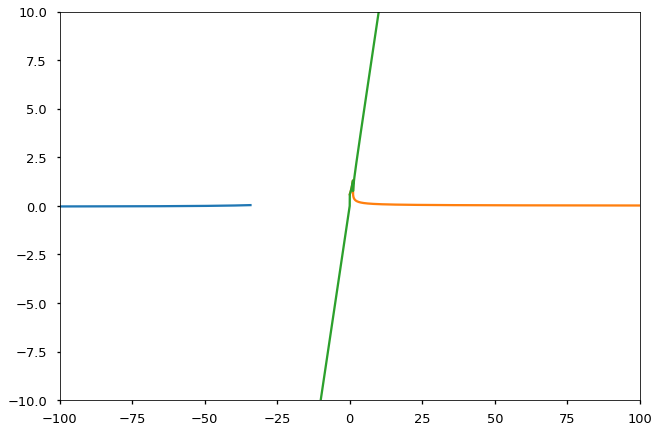

In [25]:
plt.plot(beta(theta,dn(dne1,lo),r,t)/mas,theta/mas)
plt.plot(betas/mas,thetas_p[:,0]/mas)
plt.plot(betas/mas,thetas_p[:,1]/mas)
plt.xlim(-100,100)
plt.ylim(-10,10)

/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


(-10, 10)

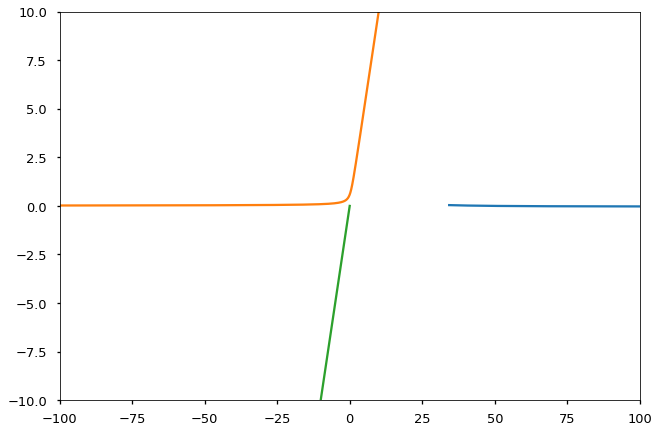

In [26]:
plt.plot(beta(theta,dn(-dne1,lo),r,t)/mas,theta/mas)
plt.plot(betas/mas,thetas_n[:,0]/mas)
plt.plot(betas/mas,thetas_n[:,1]/mas)
plt.xlim(-100,100)
plt.ylim(-10,10)

In [27]:
dtheta = np.arange(0.,10000.,0.1)*mas

/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/dana/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


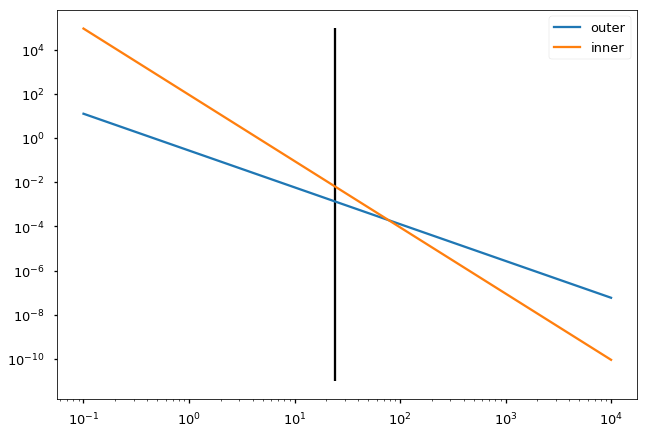

In [28]:
plt.plot(dtheta/mas,2/3*(s*dn(-dne1,lo)*t*np.sqrt(r/2))**(2/3)/dtheta**(5/3),label='outer')
plt.plot(dtheta/mas,4*r*(s*dn(-dne1,lo))**2./dtheta**3.,label='inner')
plt.vlines(s*dn(-dne1,lo)*np.sqrt(2*r/t)/mas,1e-11,1e5)
plt.xscale('log')
plt.yscale('log')
plt.legend()

So there are some images that will be due to the thin part of the lens that we will see in the secondary spectrum.  If we have evolution, we can determine which these are, but it's not as simple as fitting a single image - we do have to distinguish between these.

We should remake this plot accurately, to see what that looks like, since it's not too obvious from here.